In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ssqueezepy import ssq_cwt, ssq_stft
from ssqueezepy.experimental import scale_to_freq



In [2]:
def viz(x, Tx, Wx):
    plt.imshow(np.abs(Wx), aspect='auto', cmap='turbo')
    plt.show()
    plt.imshow(np.abs(Tx), aspect='auto', vmin=0, vmax=.2, cmap='turbo')
    plt.show()


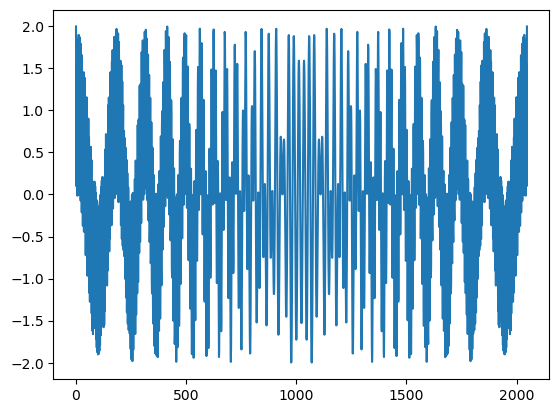

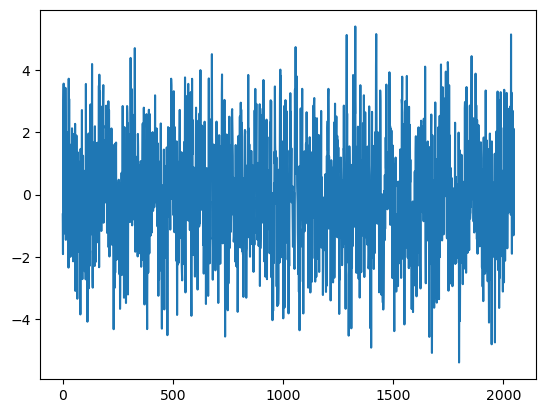

In [3]:
N = 2048
t = np.linspace(0, 10, N, endpoint=False)
xo = np.cos(2 * np.pi * 2 * (np.exp(t / 2.2) - 1))
xo += xo[::-1]  # add self reflected
x = xo + np.sqrt(2) * np.random.randn(N)  # add noise

plt.plot(xo);
plt.show()
plt.plot(x);
plt.show()


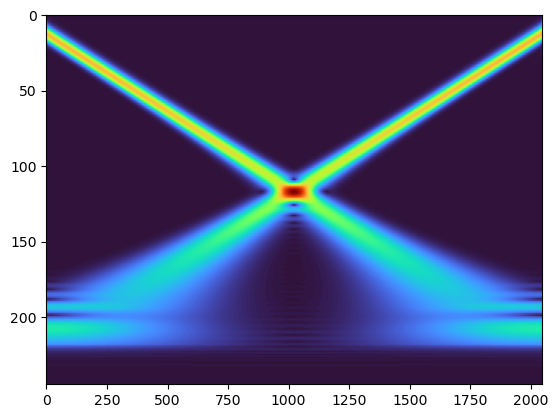

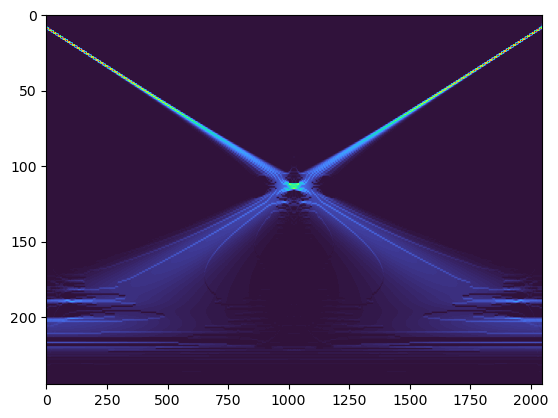

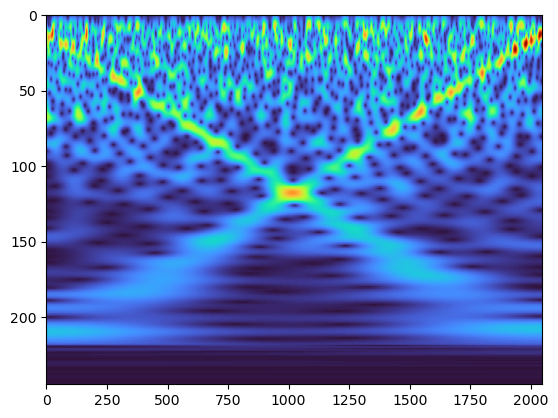

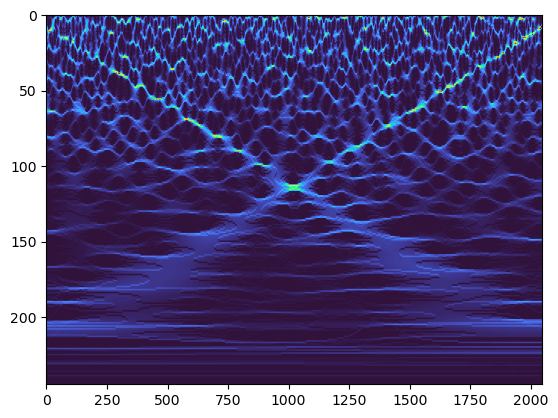

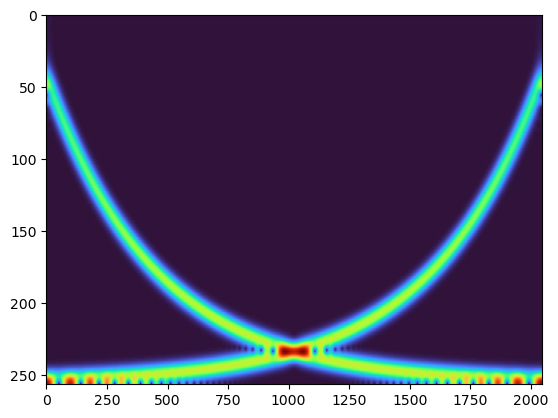

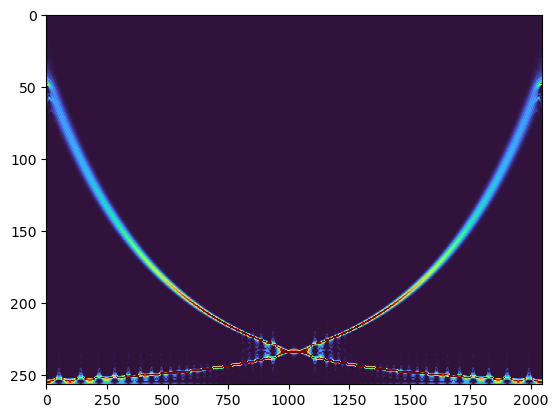

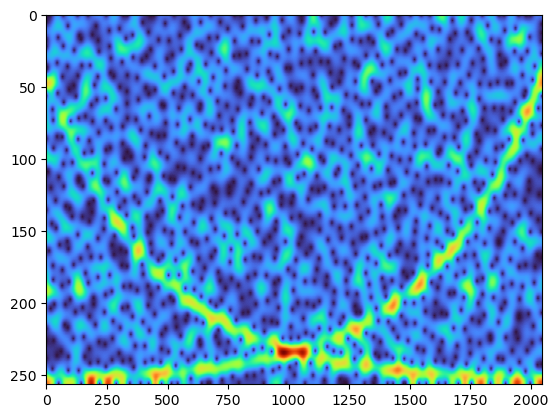

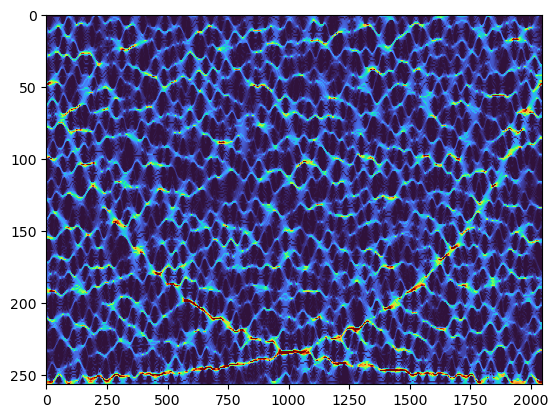

In [4]:
Twxo, Wxo, *_ = ssq_cwt(xo)
viz(xo, Twxo, Wxo)

Twx, Wx, *_ = ssq_cwt(x)
viz(x, Twx, Wx)

Tsxo, Sxo, *_ = ssq_stft(xo)
viz(xo, np.flipud(Tsxo), np.flipud(Sxo))

Tsx, Sx, *_ = ssq_stft(x)
viz(x, np.flipud(Tsx), np.flipud(Sx))

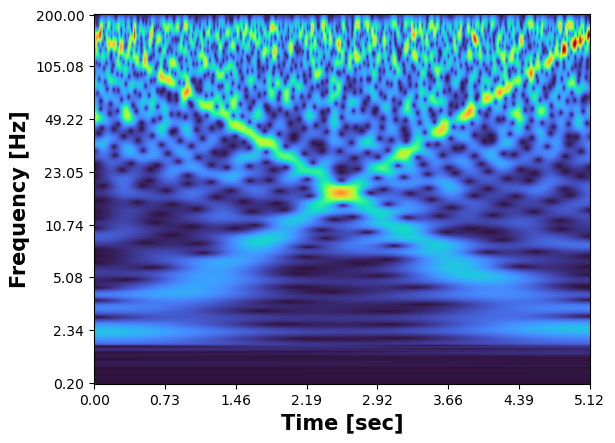

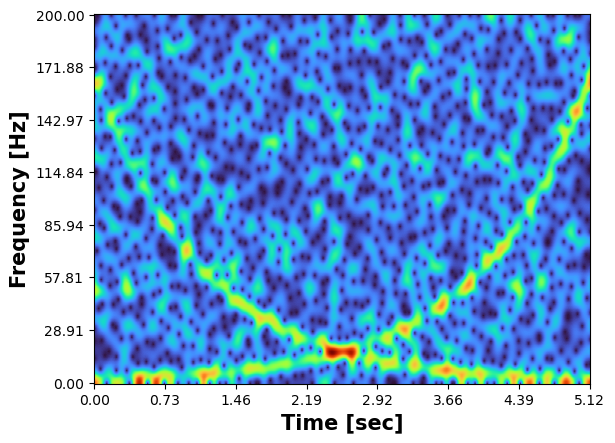

In [5]:
from ssqueezepy import Wavelet, cwt, stft, imshow

fs = 400
t = np.linspace(0, N / fs, N)
wavelet = Wavelet()
Wx, scales = cwt(x, wavelet)
Sx = stft(x)[::-1]

freqs_cwt = scale_to_freq(scales, wavelet, len(x), fs=fs)
freqs_stft = np.linspace(1, 0, len(Sx)) * fs / 2

ikw = dict(abs=1, xticks=t, xlabel="Time [sec]", ylabel="Frequency [Hz]")
imshow(Wx, **ikw, yticks=freqs_cwt)
imshow(Sx, **ikw, yticks=freqs_stft)